<a href="https://colab.research.google.com/github/imhyunho99/2023-1--Deaplearning_Framework/blob/main/4_1_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 모델의 학습

- 3장에서 설명한 부분을 제외하고 주석을 달았습니다.
- y = x^2+3

**인공신경망 이론**

뉴런의 수학적 표현

* Node and Edge  
* Fully connected layer(전결합계층)

 이전 계층의 모든 뉴런과 연결되어있는 계층
* Shallow neural network(얕은 신경망)

단일 은닉 계층, 전결합계층을 갖는 신경망

*   계층의 활성함수

Sigmoid 와 Binary search: 은닉 계측

Softmax 와 iltople search: 분류문제


One - hot Encoding과 이진분류, 다중분류

Cross entropy error(크로스 엔트로피 에러, 에러 값은 늘 양수)




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [ ]:
num_data = 1000
num_epoch = 2000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

# 모델, 손실 함수, 최적화 함수 설정

In [ ]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.


#모델 구조(계층수, 노드수, 활성함수)
# 학습 파라미터(Loss 종류, learningmate, ...)
#1만 epochs 에서 거정 마자막 loss 값을 최소로 해보자 10.4404(11.754721)
model = nn.Sequential(
          nn.Linear(1,10),
          nn.ReLU(), #각각의 노드에 적용할 활성함수(sigmoid 대신)
          nn.Linear(10,10),
          nn.ReLU(),
          nn.Linear(10,10),#그럼 은닉계층이 두개인건가..?
          nn.ReLU(),
          nn.Linear(10,1), #출력계층
      )

loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(),lr=0.01) #optim =SGD

## 모델의 학습

In [ ]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()#기울기 초기화
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.detach().numpy())

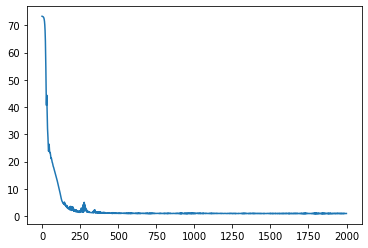

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

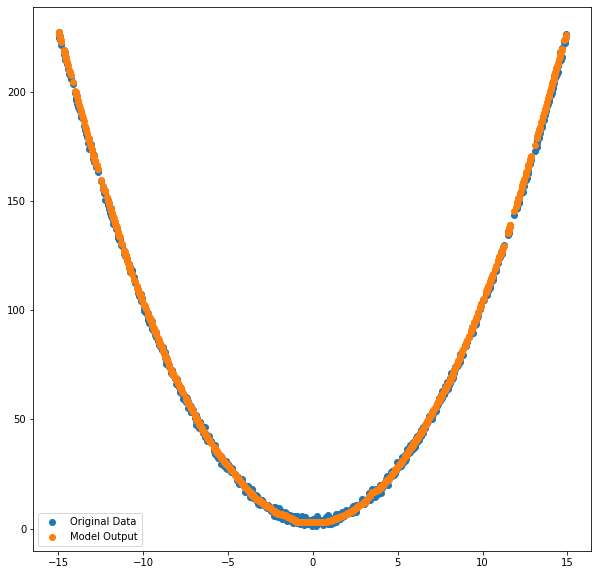

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

**인공신경망 이론-2**

E = -Σylogy~ = Entrophy


X -> H -> Y

INPUT DATA ==>[SIGMOID()]=>HIDDEN LAYER=>[SOFTMAX()]=>OUTPUT

Hx = [SIGMOID(X),
SIGMOID(Y)]

E의 최소를 생각하는 가중치 변경 ==> dE/dw(가중치에 대한 E의 편미분)

E = -Σylogy~, y~ = Softmax(y) = e^z/Σ(e^z)k

z = Σwh

i.e. dE/dw = (dE)(dy!)(dz)/(dy!)(dz)(dw) = (-y/y!)*h

= -y(1-y!)h = dE/dw

위와 같은 방식으로 입력값에 따른 가중치를 새로고침 한다고 생각하자.




****인공신경망이 갖는 장점****

벡터와 행렬로 구성된 복잡한 모델링이 가능하다. 즉 비선형 모델링의 가능성은 신경망 구조의 가장 큰 무기인듯 ==> 활성함수의 도입




In [ ]:
loss_array[-1]

array(0.9606098, dtype=float32)

adam use:8.018224


adam use, lr0.001:0.7880434

adam, lr0.001, 6->10:0.7792886

epoch 10000->2000
